# Imports

In [1]:
import augly.image as imaugs
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# Creating Augmented Data Folders

In [2]:
# Static paths
cat_path = "train/cats/"
dog_path = "train/dogs/"
aug_cat_path = "augmented/cats/"
aug_dog_path = "augmented/dogs/"

# Creating directories if they don't already exist
os.makedirs(aug_cat_path, exist_ok=True)
os.makedirs(aug_dog_path, exist_ok=True)

# Augmentation Logic

In [3]:
# Defining 10 augmentations as a list of lambda functions
augmentations = [
    lambda img: imaugs.blur(img),
    lambda img: imaugs.color_jitter(img),
    lambda img: imaugs.contrast(img),
    lambda img: imaugs.hflip(img),
    lambda img: imaugs.vflip(img),
    lambda img: imaugs.rotate(img),
    lambda img: imaugs.sharpen(img),
    lambda img: imaugs.shuffle_pixels(img),
    lambda img: imaugs.crop(img),
    lambda img: imaugs.scale(img)
]

# Applying 3 random augmentations sequentially to a given image
def apply_random_augmentations(image):
    # Choosing 3 random augmentations without replacement
    selected_augs = np.random.choice(augmentations, 3, replace=False)
    
    # Printing the memory addresses of the selected augmentations
    print(selected_augs)

    # Applying the augmentations sequentially
    augmented_image = image
    for aug in selected_augs:
        augmented_image = aug(augmented_image)
    
    # Returning the final augmented image
    return augmented_image

# Augmenting our Images

In [4]:
for i, cat in enumerate(os.listdir(cat_path)):
    # Loading the current image twice
    img1 = Image.open(cat_path + cat)
    img2 = Image.open(cat_path + cat)

    # Applying random augmentations to both images
    img1 = apply_random_augmentations(img1)
    img2 = apply_random_augmentations(img2)

    # Saving the augmented images
    img1.save(f"augmented/cats/{2 * i}.jpg")
    img2.save(f"augmented/cats/{2 * i + 1}.jpg")

for i, dog in enumerate(os.listdir(dog_path)):
    # Loading the current image twice
    img1 = Image.open(dog_path + dog)
    img2 = Image.open(dog_path + dog)

    # Applying random augmentations to both images
    img1 = apply_random_augmentations(img1)
    img2 = apply_random_augmentations(img2)

    # Saving the augmented images
    img1.save(f"augmented/dogs/{2 * i}.jpg")
    img2.save(f"augmented/dogs/{2 * i + 1}.jpg")

[<function <lambda> at 0x7b3f545bb100>
 <function <lambda> at 0x7b3f642e5ee0>
 <function <lambda> at 0x7b3f545bafc0>]
[<function <lambda> at 0x7b3f545bb1a0>
 <function <lambda> at 0x7b3f545bae80>
 <function <lambda> at 0x7b3f642e5c60>]
[<function <lambda> at 0x7b3f545bb100>
 <function <lambda> at 0x7b3f545bafc0>
 <function <lambda> at 0x7b3f545baf20>]
[<function <lambda> at 0x7b3f545bae80>
 <function <lambda> at 0x7b3f642e5c60>
 <function <lambda> at 0x7b3f642e5ee0>]
[<function <lambda> at 0x7b3f545baf20>
 <function <lambda> at 0x7b3f545bb100>
 <function <lambda> at 0x7b3f642e5c60>]
[<function <lambda> at 0x7b3f642e5ee0>
 <function <lambda> at 0x7b3f545bb100>
 <function <lambda> at 0x7b3f545bb060>]
[<function <lambda> at 0x7b3f642e6340>
 <function <lambda> at 0x7b3f642e5c60>
 <function <lambda> at 0x7b3f545bafc0>]
[<function <lambda> at 0x7b3f545bade0>
 <function <lambda> at 0x7b3f642e5ee0>
 <function <lambda> at 0x7b3f545bb060>]
[<function <lambda> at 0x7b3f545baf20>
 <function <lambd

As visible above in the function memory addresses, we can see that it applies 3 transformations sequentially for each image twice. 

# Statistics of Dataset

Old cat count: 56
Old dog count: 56
New cat count: 112
New dog count: 112
Total cat count: 168
Total dog count: 168
Total image count: 336
Total old dataset size: 112
Total augmented dataset size: 224


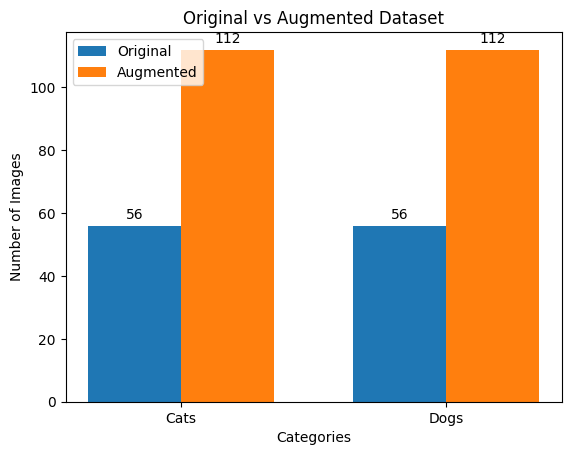

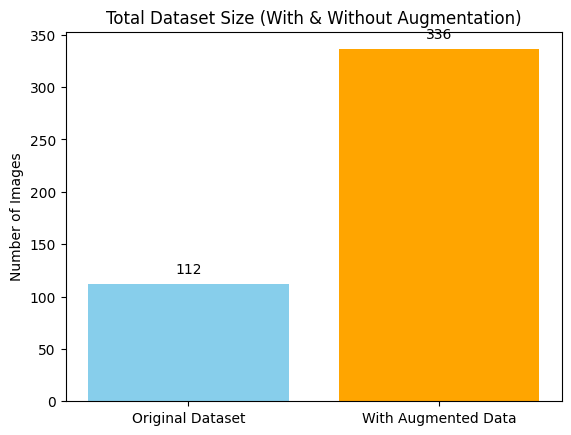

Train cat count: 56
Train dog count: 56
Test cat count: 14
Test dog count: 14


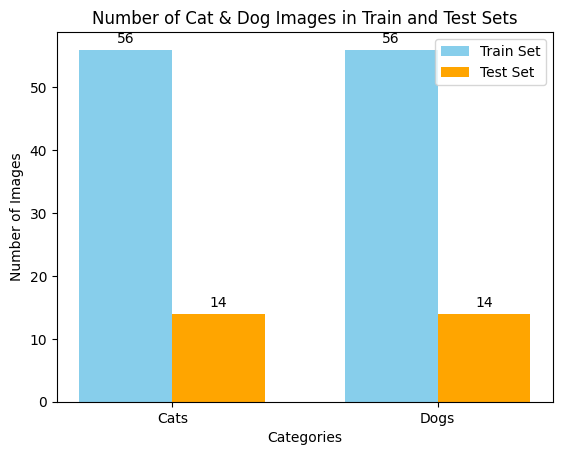

In [6]:
# Count original and augmented images
train_cat_count = len(os.listdir(cat_path))
train_dog_count = len(os.listdir(dog_path))
augmented_cat_count = len(os.listdir(aug_cat_path))
augmented_dog_count = len(os.listdir(aug_dog_path))

# Print statistics
print(f"Old cat count: {train_cat_count}")
print(f"Old dog count: {train_dog_count}")
print(f"New cat count: {augmented_cat_count}")
print(f"New dog count: {augmented_dog_count}")

print(f"Total cat count: {train_cat_count + augmented_cat_count}")
print(f"Total dog count: {train_dog_count + augmented_dog_count}")

print(f"Total image count: {train_cat_count + train_dog_count + augmented_cat_count + augmented_dog_count}")
print(f"Total old dataset size: {train_cat_count + train_dog_count}")
print(f"Total augmented dataset size: {augmented_cat_count + augmented_dog_count}")

# Plotting

# 1. Train Set vs Augmented Train Set
labels = ['Cats', 'Dogs']
original_counts = [train_cat_count, train_dog_count]
augmented_counts = [augmented_cat_count, augmented_dog_count]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, original_counts, width, label='Original')
rects2 = ax.bar(x + width/2, augmented_counts, width, label='Augmented')

# Add labels, title, and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Images')
ax.set_title('Original vs Augmented Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display values on bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # Offset text above bars
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# 2. Total Dataset Size Comparison (With & Without Augmentation)
fig, ax = plt.subplots()
total_original = train_cat_count + train_dog_count
total_augmented = total_original + augmented_cat_count + augmented_dog_count

ax.bar(['Original Dataset', 'With Augmented Data'], [total_original, total_augmented], color=['skyblue', 'orange'])

# Add labels and title
ax.set_ylabel('Number of Images')
ax.set_title('Total Dataset Size (With & Without Augmentation)')

# Display values on bars
for i, v in enumerate([total_original, total_augmented]):
    ax.text(i, v + 10, str(v), color='black', ha='center')

plt.show()

# Paths to train and test directories
test_cat_path = "test/cats/"
test_dog_path = "test/dogs/"

# Count images in train and test sets
test_cat_count = len(os.listdir(test_cat_path))
test_dog_count = len(os.listdir(test_dog_path))

# Verify that both train and test datasets are balanced
print(f"Train cat count: {train_cat_count}")
print(f"Train dog count: {train_dog_count}")
print(f"Test cat count: {test_cat_count}")
print(f"Test dog count: {test_dog_count}")

# Plot: Number of Cat & Dog Images in Train and Test Sets
labels = ['Cats', 'Dogs']
train_counts = [train_cat_count, train_dog_count]
test_counts = [test_cat_count, test_dog_count]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_counts, width, label='Train Set', color='skyblue')
rects2 = ax.bar(x + width/2, test_counts, width, label='Test Set', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Images')
ax.set_title('Number of Cat & Dog Images in Train and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display values on bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

### **The Importance of Balanced Datasets in Machine Learning**

In machine learning, particularly in classification tasks like distinguishing between cat and dog images, maintaining a **balanced dataset** is very important for achieving reliable model performance. A balanced dataset ensures that each class has an equal or nearly equal number of samples, preventing the model from becoming biased toward the majority class. When datasets are imbalanced, where one class (e.g., dogs) significantly outnumbers another (e.g., cats), the model tends to favor the majority class during predictions. This imbalance can lead to **skewed performance metrics**, where overall **accuracy** might appear high, but class-specific metrics like **precision**, **recall**, and **F1-score** reveal poor performance on the minority class.

For example, if a model is trained on a dataset with far more dog images than cat images, it may learn to predict "dog" by default to optimize overall accuracy. However, this comes at the cost of **recall** for the cat class, which measures the proportion of actual cat images correctly identified by the model. Low recall indicates that many cat images are being misclassified as dogs, resulting in a high **false negative** rate. Similarly, **precision** for the cat class, measuring the proportion of predicted cat images that are truly cats, may also suffer if the model occasionally predicts "cat" incorrectly due to overfitting to the majority class features.

To make our datasets more robust, **data augmentation** is commonly performed.